In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [3]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

volt_mean  volt_std   volt_min   volt_max  volt_median  volt_num_peaks  \
0  25.082900  4.071472  20.946431  31.904116    22.789393              58   
1  21.805455  4.559532  17.650261  32.309671    19.156396              45   
2  10.836046  6.775415   0.488797  24.490319    13.995884              35   
3  24.183579  4.621104  19.609428  33.227813    22.517511              45   
4  23.060809  4.267037  19.056026  31.212664    20.864398              46   

   volt_time_to_peak   curr_mean    curr_std   curr_min  ...  curr_median  \
0            0.00070  234.996261  182.106083  75.655477  ...   120.861332   
1            0.00073  150.916812  168.711186  28.637912  ...    48.143109   
2            0.00046  136.959789  169.364510  28.742765  ...    39.112823   
3            0.00040  165.505846  177.347388  28.541514  ...    67.357359   
4            0.00056  188.768174  183.675335  53.806853  ...    67.383472   

   curr_num_peaks  curr_time_to_peak   power_mean     power_std    power_min  \
0              56            0.00070  6634.533721  16762.390996  1592.268291   
1              25            0.00035  3997.867721  15740.791843   509.146334   
2              23            0.00030  1529.663519  11664.894729    14.049377   
3              30            0.00029  4806.975192  17673.443390   563.717954   
4              49            0.00051  5124.597122  16573.347634  1030.957684   

      power_max  volt_dom_freq  curr_dom_freq  labels  
0  16762.390996          500.0          500.0       0  
1  15740.791843          500.0          500.0       1  
2  11664.894729            0.0          500.0       0  
3  17673.443390          500.0          500.0       0  
4  16573.347634          500.0          500.0       0  

[5 rows x 21 columns]

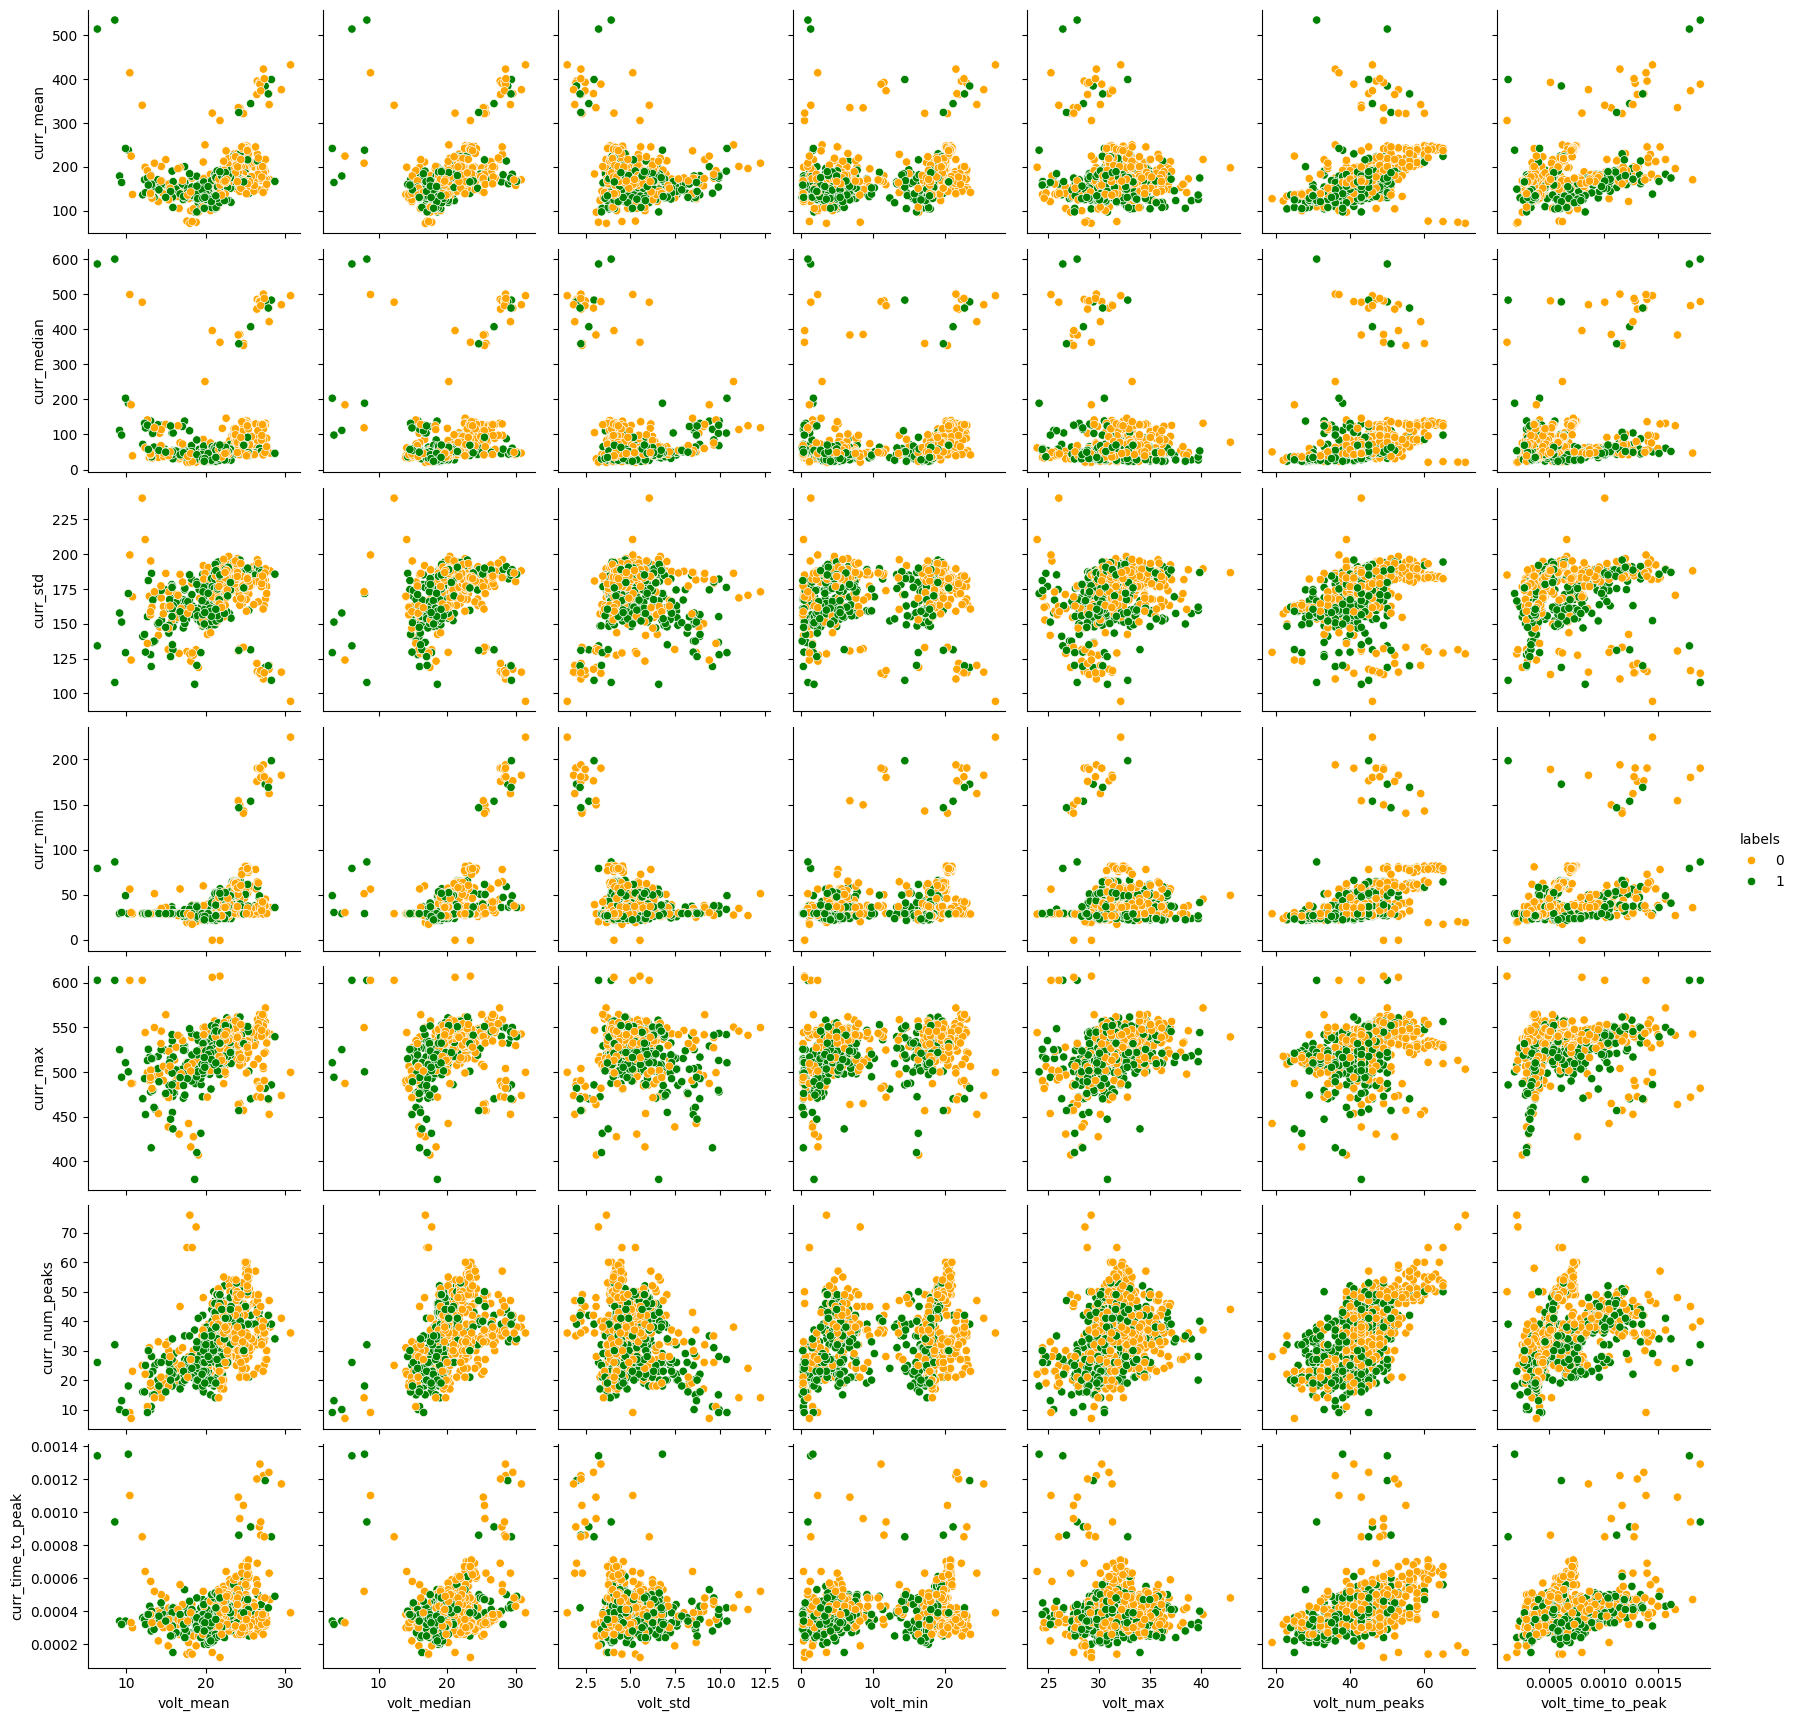

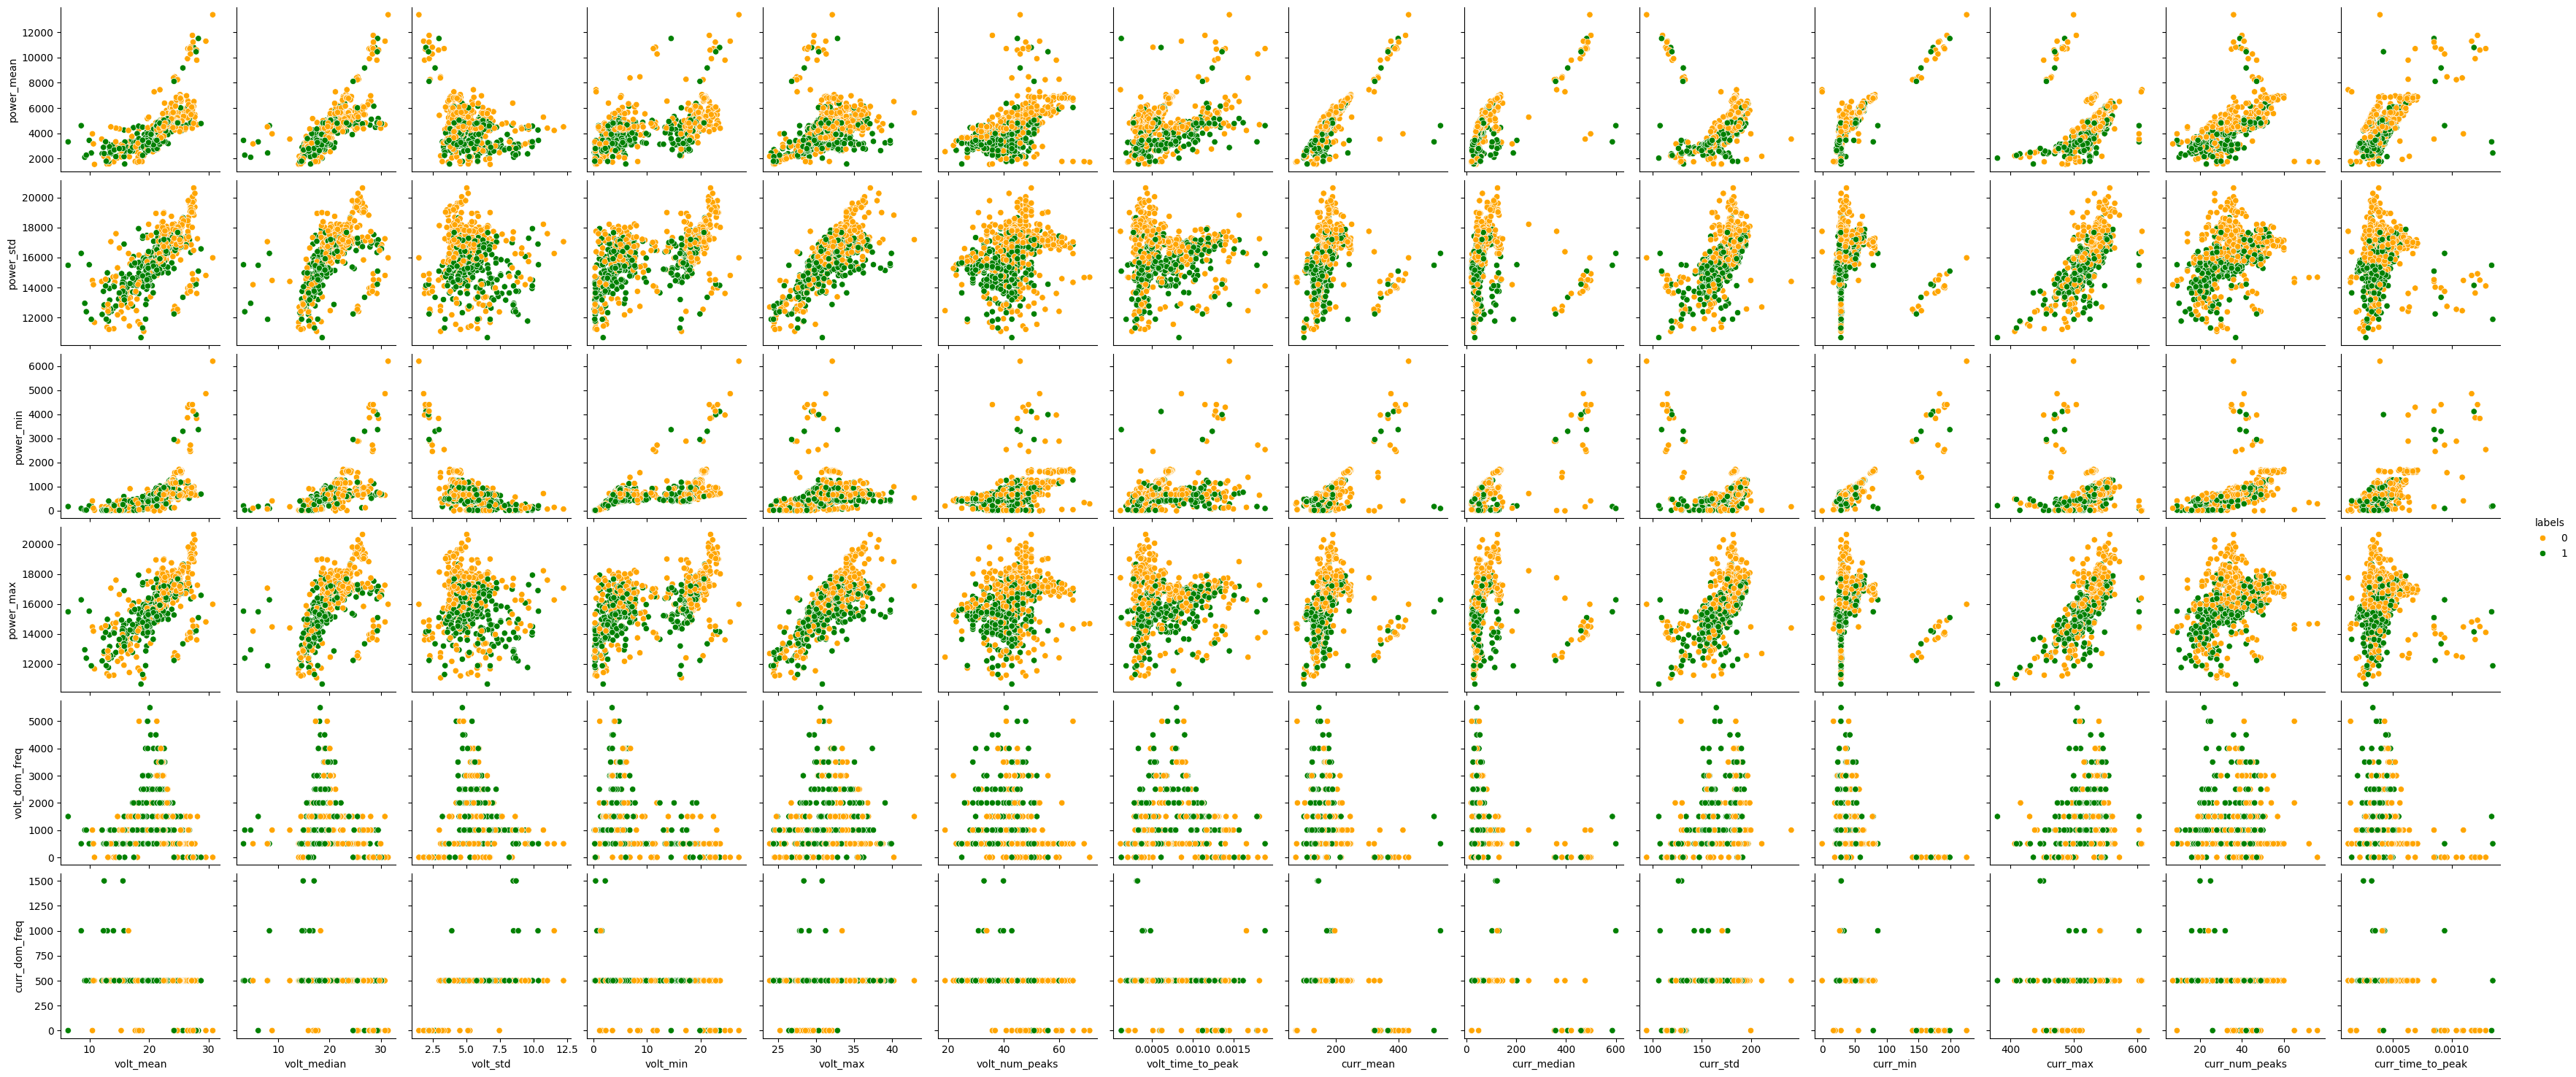

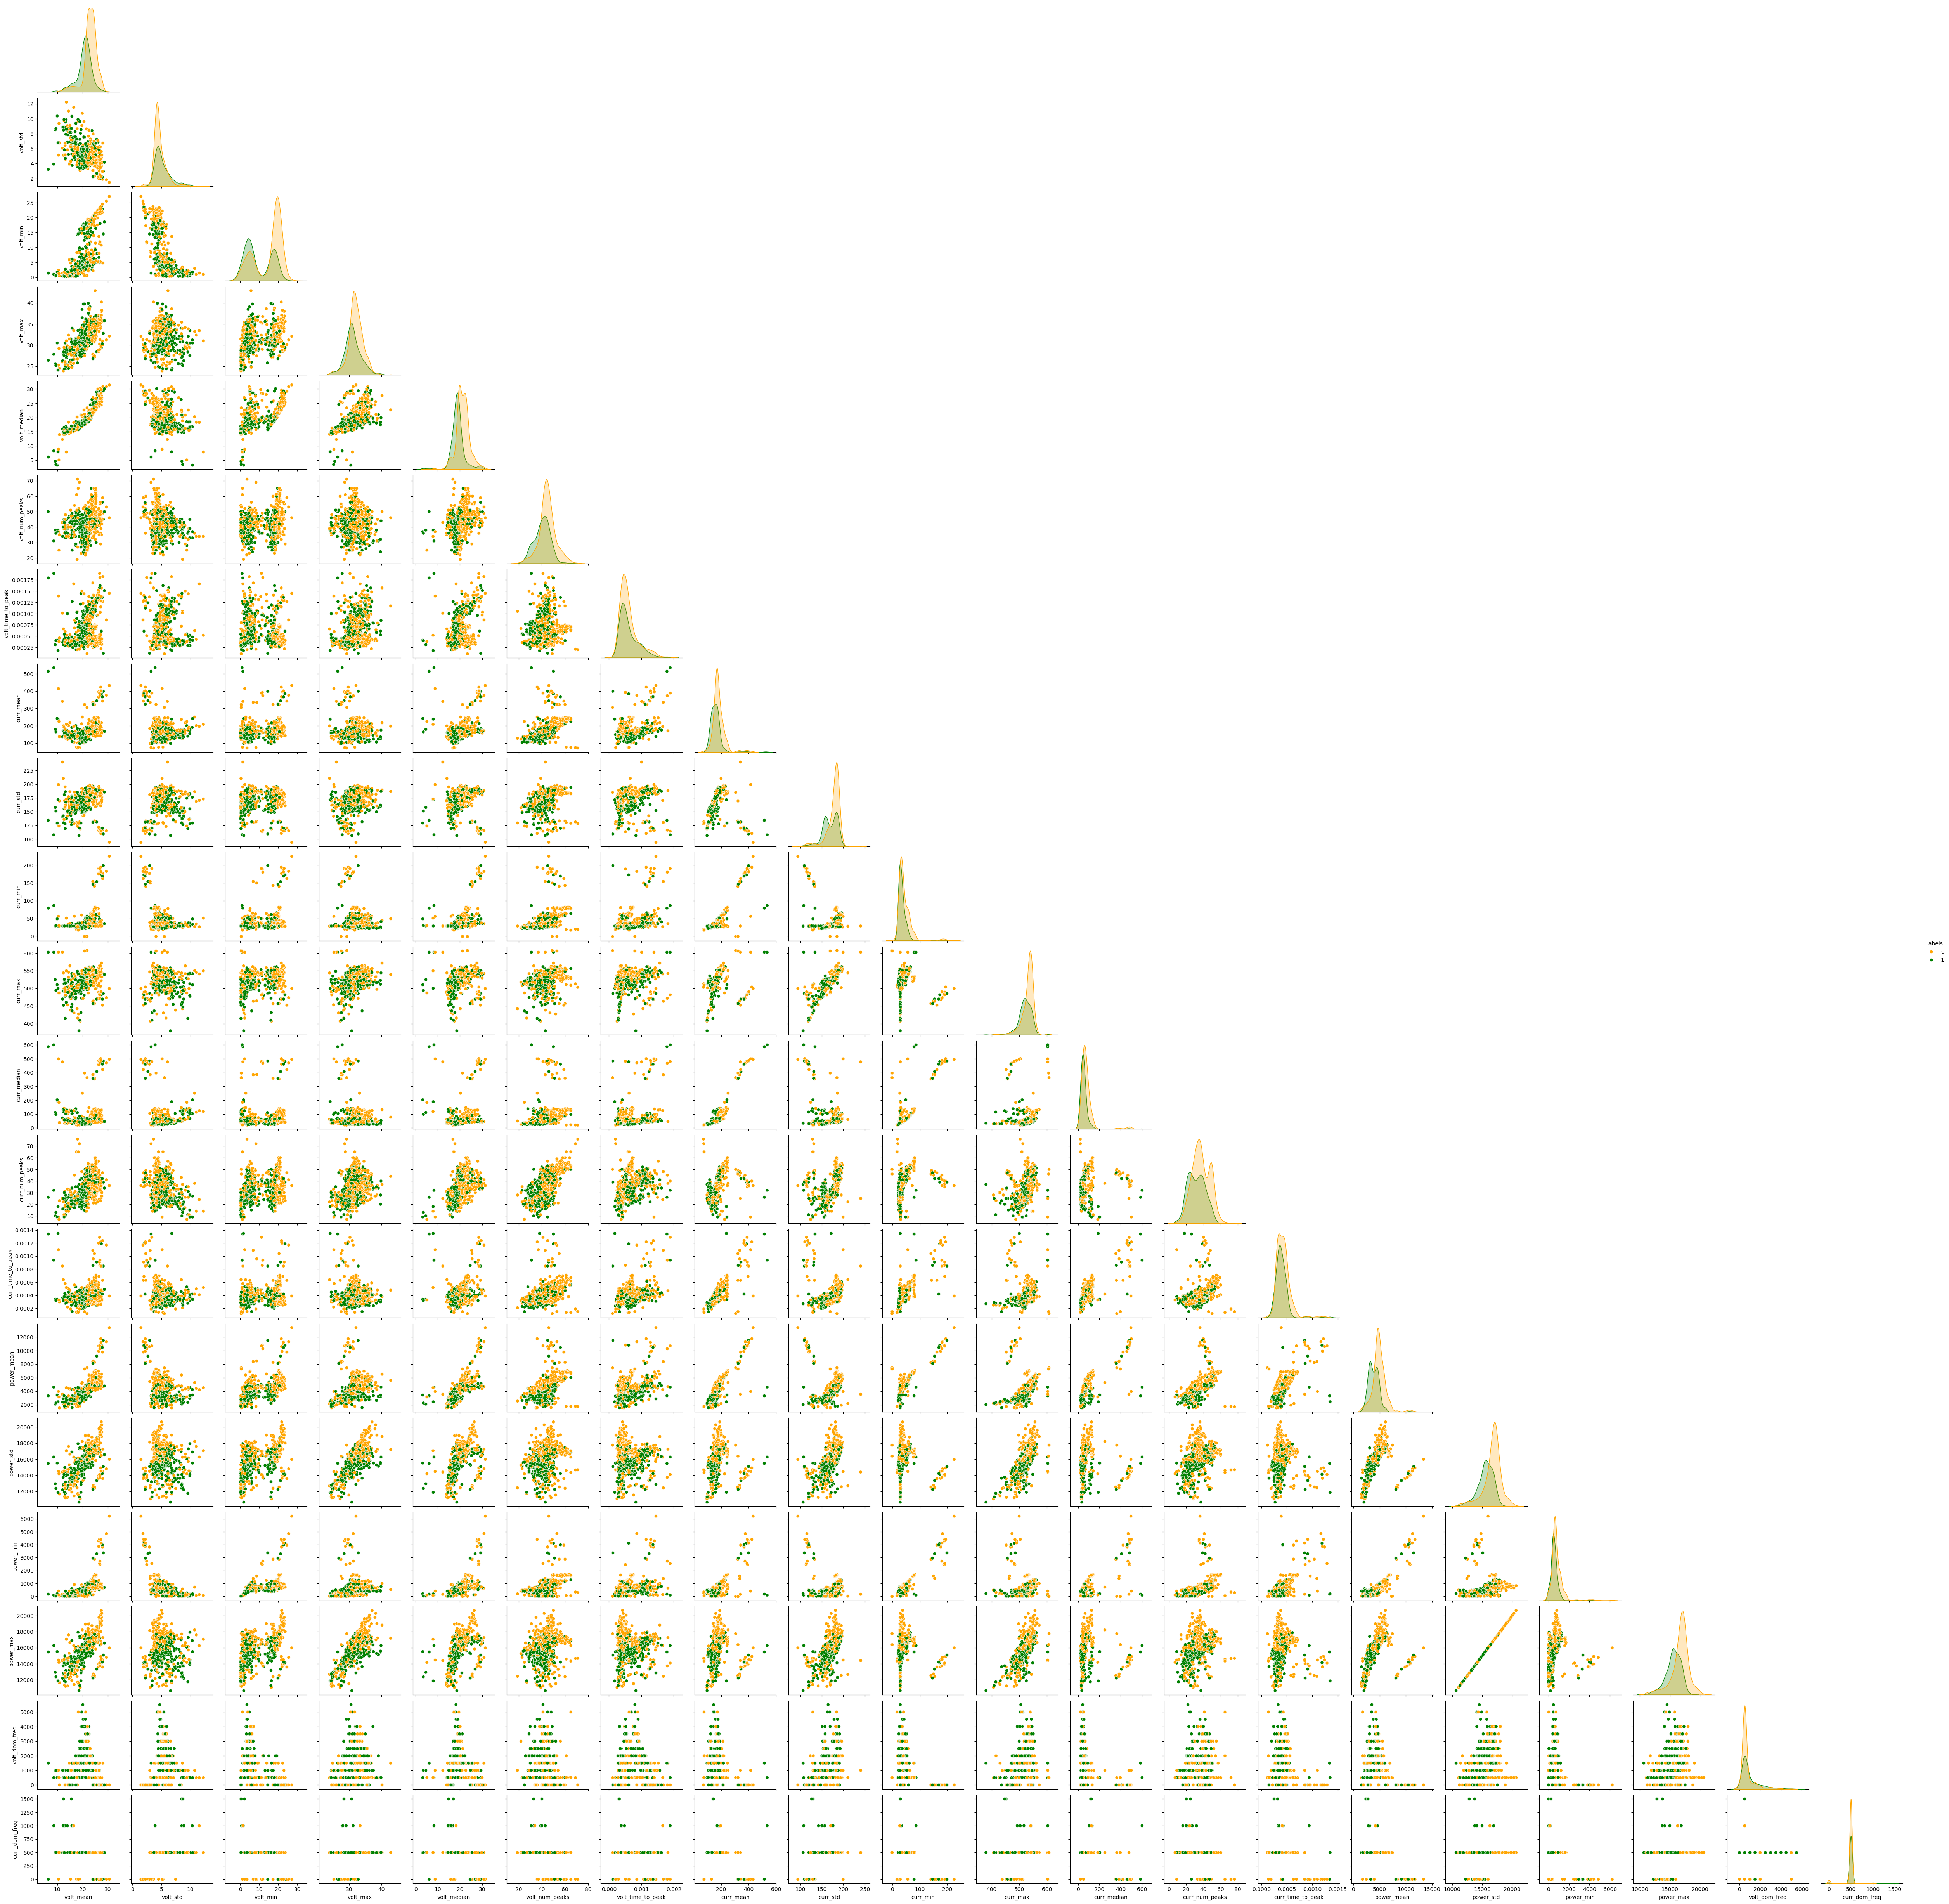

In [5]:
fig = sns.pairplot(
    features,
    hue="labels",
    x_vars=['volt_mean', 'volt_median', 'volt_std', 'volt_min', 'volt_max', 'volt_num_peaks', 'volt_time_to_peak'],
    y_vars=['curr_mean', 'curr_median', 'curr_std', 'curr_min', 'curr_max', 'curr_num_peaks', 'curr_time_to_peak'],
    palette={0: 'orange', 1: 'green'},
    corner=False
)

fig.figure.savefig(plot_path / "curr-volt_pairplot.png")

fig2 = sns.pairplot(
    features,
    hue="labels",
    x_vars=['volt_mean', 'volt_median', 'volt_std', 'volt_min', 'volt_max', 'volt_num_peaks', 'volt_time_to_peak', 'curr_mean', 'curr_median', 'curr_std', 'curr_min', 'curr_max', 'curr_num_peaks', 'curr_time_to_peak'],
    y_vars=['power_mean', 'power_std', 'power_min', 'power_max', 'volt_dom_freq', 'curr_dom_freq'],
    palette={0: 'orange', 1: 'green'},
    corner=False
)

fig2.figure.savefig(plot_path / "tight_pairplot.png")

fig3 = sns.pairplot(
    features,
    hue="labels",
    palette={0: 'orange', 1: 'green'},
    corner=True
)

fig3.figure.savefig(plot_path / "full_pairplot.png")

## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


#### Answers:
1. Maximum value of power, power standard deviation, power mean, volt mean, dominant frequency of current.
2. Current minimum with voltage std, max and median. Since the extent of the correlation varies with different second variables, it is not necessary to remove current minimum as a feature.
3.
4.
5.